In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
from collections import defaultdict
import sys
sys.path.insert(0, '..')
from utils.plot_lib import set_default

set_default(figsize=(6, 4))

## Statement

A hospital with 400 heart attack patients, of whom died within 30 days, and 328 are still alive.

Let's plot the likelihood function. Using a Bernoulli likelihood. The likelihood is a function of the mortality rate $\theta$

$ Y \sim B(\theta) $

$ f(x | \theta) = \theta^x (1 - \theta)^{1 - \theta} $

$ \mathcal{L}(\theta | y) = \prod_{i=1}^{n} \theta^{y_i} (1 - \theta)^{1 - y_i} $

$ \mathcal{L}(\theta | y) = \theta^{y} (1 - \theta)^{n - y} $

where: 

$y = \text{mortalities}$
$n = \text{Heart attack patients}$

In [2]:
from scipy.stats import bernoulli

# Range of theta
theta = np.arange(0, 1, 0.01)
n = 400
y = 72

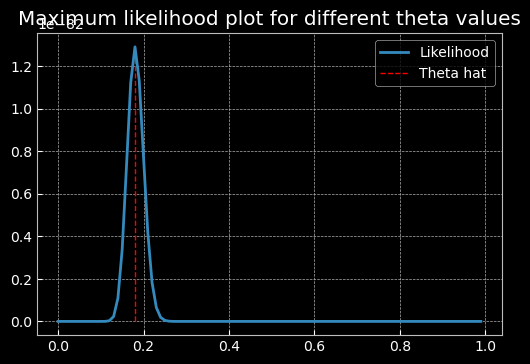

The maximum likelihood was obtained with theta hat {} 1.289923483469054e-82


In [3]:
# Maximum likelihood could be obtained visually thorugh the next plot
bernoulli = np.power(theta, y) * np.power((1 - theta), (n - y))
theta_hat = np.max(bernoulli)

plt.plot(theta, bernoulli, label = 'Likelihood')
plt.vlines(y / n, 0, theta_hat, colors='r', linestyles='--', lw=1, label='Theta hat')
plt.legend()
plt.title('Maximum likelihood plot for different theta values')
plt.show()
print('The maximum likelihood was obtained with theta hat {}',format(theta_hat))

### Plotting the likelihood for Bernoulli

$ \mathcal{L}(\theta) = \sum_i^n y_i ln(\theta) + \sum_i^n (1 - y_i)ln(1 - \theta) $

$ \mathcal{L}(\theta) = y ln(\theta) + (n - y)ln(1 - \theta) $

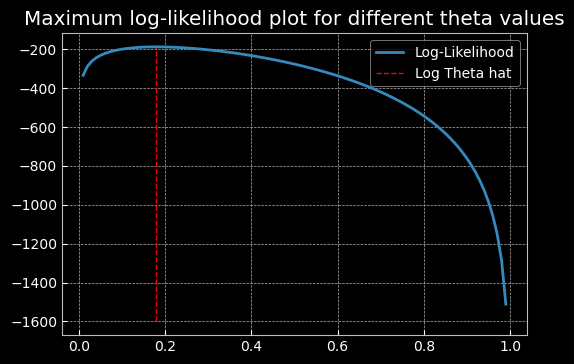

The maximum log-likelihood was obtained with theta hat {} -188.55739472403764


In [4]:
log_bernoulli = y * np.log(theta) + (n - y) * np.log(1 - theta)

log_theta_hat = np.max(log_bernoulli)

plt.plot(theta, log_bernoulli, label = 'Log-Likelihood')
plt.vlines(y / n, -1600, log_theta_hat, colors='r', linestyles='--', lw=1, label='Log Theta hat')
plt.legend()
plt.title('Maximum log-likelihood plot for different theta values')
plt.show()
print('The maximum log-likelihood was obtained with theta hat {}',format(log_theta_hat))

Notice that both MLE for theta where the same under the log and normal function.

In [5]:
from scipy.stats import gamma

In [6]:
# Lambda is 1/scale
v = gamma(67., loc = 0., scale = 1/6)
# Cumulative density
gamma.cdf(0.05, 67., loc = 0., scale = 1/6)

1.8915021961945033e-130

In [7]:
gamma.ppf(0.05, 67., loc = 0., scale = 1/6)

9.021381966387127

In [8]:
a, b = 6, 93.5
# Lambda is 1/scale
v = gamma(a, loc = 0., scale = 1/b)
# Cumulative density
v.cdf(1/10)

0.9039698786381929

In [9]:
a, b = 9, 390
# Lambda is 1/scale
v = gamma(a, loc = 0., scale = 1/b)
# Cumulative density
v.ppf(0.95)

0.037011922346657206